# 1. 导入包

In [1]:
'''
Python 3.7.7
sklearn 0.23.1
不同分类模型对客户是否购买汽车新车型预测的对比分析
'''

# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# 2. 导入数据集

In [2]:
# 导入数据集
dataset = pd.read_csv('Social_Network_Ads.csv')

# 3. 数据预处理

## 3.1 检测缺失值

In [3]:
# 检测缺失值
null_df = dataset.isnull().sum()

## 3.2 生成自变量和因变量

In [4]:
# 生成自变量和因变量
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

## 3.3 查看样本是否均衡

In [5]:
# 查看样本是否均衡
sample_0 = sum(dataset['Purchased']==0)
sample_1 = sum(dataset['Purchased']==1)
print('不买车的样本占总样本的%.2f' %(sample_0/(sample_0 + sample_1)))

不买车的样本占总样本的0.64


## 3.4 拆分数据集

In [6]:
# 将数据拆分成训练集和测试集，数据比例为3:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## 3.5 特征缩放

In [7]:
# 特征缩放
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4. 构建3种分类模型

In [8]:
# 构建逻辑回归模型、KNN模型和朴素贝叶斯模型
# 模型1：构建逻辑回归模型并训练模型（penalty='l2', C=1, class_weight='balanced'）
lr_classifier = LogisticRegression(penalty='l2', C=1, class_weight='balanced', random_state = 0)
lr_classifier.fit(X_train, y_train)

# 模型2：构建KNN模型并训练模型（n_neighbors = 5, weights='uniform', metric = 'minkowski', p = 2）
knn_classifier = KNeighborsClassifier(n_neighbors = 5, weights='uniform', metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

# 模型3：构建高斯朴素贝叶斯模型并训练模型
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

# 5. 使用3种分类模型做预测

In [9]:
# 预测测试集
y_pred_lr = lr_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)
y_pred_nb = nb_classifier.predict(X_test)

# 6. 通过多个指标评估模型性能

## 6.1 通过准确率评估

In [10]:

# 评估模型性能（通过准确率、分类报告、ROC曲线评估）
# 通过准确率评估
print('逻辑回归的准确率是：%.2f' %(accuracy_score(y_test, y_pred_lr))) # 0.89
print('KNN的准确率是：%.2f' %(accuracy_score(y_test, y_pred_knn))) # 0.93
print('朴素贝叶斯的准确率是：%.2f' %(accuracy_score(y_test, y_pred_nb))) # 0.90

逻辑回归的准确率是：0.89
KNN的准确率是：0.93
朴素贝叶斯的准确率是：0.90


## 6.2 通过分类报告评估

In [11]:

# 通过分类报告评估
print('逻辑回归的分类报告是：\n', classification_report(y_test, y_pred_lr))
print('KNN的分类报告是：\n', classification_report(y_test, y_pred_knn))
print('朴素贝叶斯的分类报告是：\n', classification_report(y_test, y_pred_nb))

逻辑回归的分类报告是：
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        68
           1       0.80      0.88      0.84        32

    accuracy                           0.89       100
   macro avg       0.87      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100

KNN的分类报告是：
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

朴素贝叶斯的分类报告是：
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90  

## 6.3 通过ROC曲线评估

### 6.3.1 先生成3个模型的预测概率

In [12]:
# 先生成3个模型的预测概率
y_pred_proba_lr = lr_classifier.predict_proba(X_test)[:,1]
y_pred_proba_knn = knn_classifier.predict_proba(X_test)[:,1]
y_pred_proba_nb = nb_classifier.predict_proba(X_test)[:,1]

### 6.3.2 将3个模型的预测结果放到DataFrame中

In [13]:
# 将3个模型的预测结果放到DataFrame中
results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])
predictions = {'LR': y_pred_proba_lr, 'KNN': y_pred_proba_knn, 'NB': y_pred_proba_nb}

for key in predictions:
    fpr, tpr, _ = roc_curve(y_test, predictions[key])
    auc = roc_auc_score(y_test, predictions[key])
    results_table = results_table.append({'models': key,
                                          'fpr' : fpr,
                                          'tpr' : tpr,
                                          'auc' : auc}, ignore_index=True)
results_table.set_index('models', inplace=True)
print(results_table)

                                                      fpr  \
models                                                      
LR      [0.0, 0.0, 0.0, 0.014705882352941176, 0.014705...   
KNN     [0.0, 0.014705882352941176, 0.0294117647058823...   
NB      [0.0, 0.0, 0.0, 0.014705882352941176, 0.014705...   

                                                      tpr       auc  
models                                                               
LR      [0.0, 0.03125, 0.1875, 0.1875, 0.75, 0.75, 0.8...  0.954504  
KNN        [0.0, 0.59375, 0.84375, 0.90625, 0.96875, 1.0]  0.963006  
NB      [0.0, 0.03125, 0.28125, 0.28125, 0.78125, 0.78...  0.963235  


### 6.3.3 画出ROC曲线

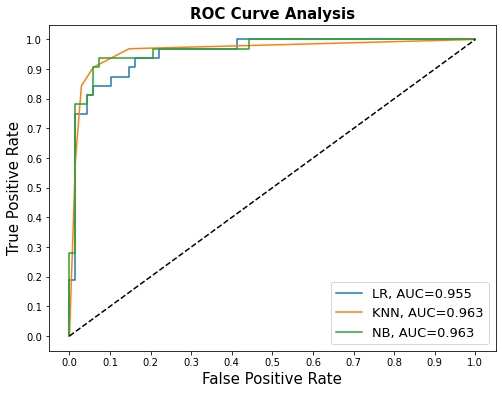

In [14]:
# 画出ROC曲线
fig = plt.figure(figsize = (8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()

#### 结论：
由ROC曲线可见，3种模型的AUC都大于90%，说明模型性能很好。